# 다중 분류(Multiclass Classification) 복습
---
**데이터셋**: penguins.csv

**다중 분류**(Multiclass Classification)

**KNN**(K-Nearest Neighbor, K-최근접 이웃)

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비 & 전처리

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: /content/penguins.csv
13.8kB [00:00, 12.7MB/s]       


In [ ]:
penguins = pd.read_csv('penguins.csv')
penguins.shape

(344, 7)

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df = penguins.copy()

In [ ]:
# 결측치 제거하기
df = df.dropna()

In [ ]:
df.isna().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        dic = {x: idx for idx, x in enumerate(sorted(df[col].unique()))}
        print(col, '변수:', dic)

species 변수: {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
island 변수: {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
sex 변수: {'FEMALE': 0, 'MALE': 1}


In [ ]:
# 범주형 변수의 인코딩
df['species'] = df['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
df['island'] = df['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
df['sex'] = df['sex'].map({'FEMALE': 0, 'MALE': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


In [ ]:
# X, y 구분
X = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(266, 6) (67, 6)
(266,) (67,)


### 표준화(Standardization)
- 평균이 0, 분산이 1인 가우시안 정규분포<br>
$Z=\frac{X-μ}{σ}$

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s =  scaler.transform(X_test)

y_train = y_train.values
y_test = y_test.values

### 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scores = []

for i in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_s, y_train)
    score = clf.score(X_train_s, y_train)
    scores.append(score)

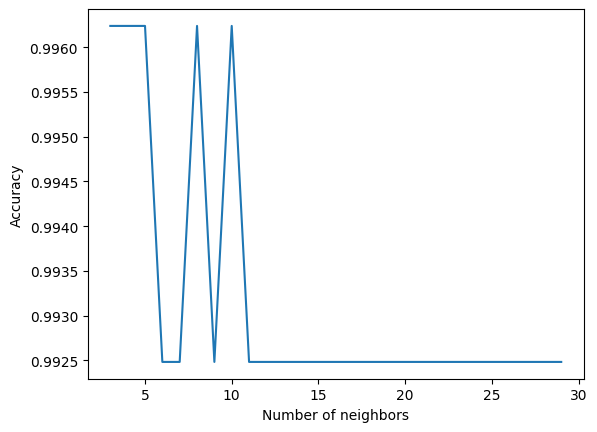

In [ ]:
plt.plot(range(3, 30), scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

- **Best Performance**: k=5

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s, y_train)

KNeighborsClassifier()

### 예측

In [ ]:
y_pred = clf.predict(X_test_s)
y_pred

array([1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2,
       0])

- **성능 평가**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average=average)
    rec = recall_score(y_true, y_pred, average=average)

    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [ ]:
# 다중 분류: average='macro'
print_score(y_test, y_pred, average='macro')

accuracy: 0.9850746268656716
precision: 0.9761904761904763
recall: 0.989247311827957
